In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/learn_nlp/rob_mulla/datasets

/content/drive/MyDrive/learn_nlp/rob_mulla/datasets


In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
nltk.download('punkt_tab')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [ ]:
data = pd.read_csv("Reviews.csv")
data.shape

(568454, 10)

## EDA

In [ ]:
data['Text']

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


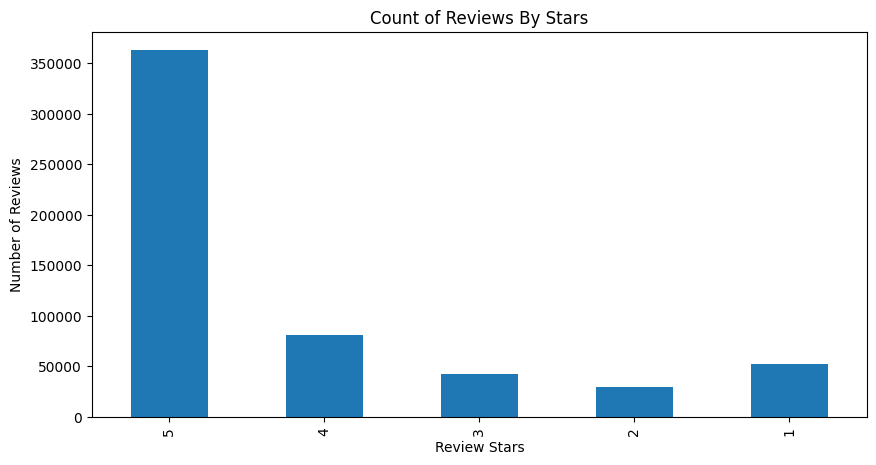

In [ ]:
ax = data['Score'].value_counts().sort_index(ascending=False).plot(kind='bar', title = 'Count of Reviews By Stars', figsize=(10,5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of Reviews')
plt.show()

In [ ]:
x1 = data['Text'][50]
x1

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [ ]:
# Tokenization
tokens = nltk.word_tokenize(x1)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [ ]:
# Part of Speech Tagging(POS Tagging)
tags = nltk.pos_tag(tokens)
tags[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
# Named Entity Recognition
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()                                 # pprint = pretty print. For some reason, we cant use just print.

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER SENTIMENT SCORING

This is an algorithm that scores how positive, negative or neutral a word is, and it does this for every sentence and gives an overall score of the sentence sentiment.
Note: Keep in mind that this approach doesn't account for relationships between words which is very important in human interactions. But, this is just for a start, and its a good start.

VADER uses a bag-of-words approach(BOW), so we have to remove stopwords.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores('My mum hates it but my Dad loves')

# Compund is an overall view of the text sentiment and ranges from -1 to +1

{'neg': 0.15, 'neu': 0.462, 'pos': 0.388, 'compound': 0.6249}

In [ ]:
sia.polarity_scores("The food isn't that bad")

{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.431}

In [ ]:
sia.polarity_scores(x1)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Now let's get the sentiment score for each text in our dataframe. We would reduce the size of our data for lower computing time.

In [ ]:
df = data.iloc[:100, :]
df.shape

(100, 10)

In [ ]:
res = {}
for index, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
res
# Lets put it ion a daatframe
vaders = pd.DataFrame(res).T  # T would transpose the dataframe
vaders = vaders.reset_index().rename(columns={'index':'Id'})  # Renaming index as ID
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
95,96,0.031,0.732,0.237,0.9273
96,97,0.000,0.818,0.182,0.9820
97,98,0.053,0.793,0.154,0.7729
98,99,0.024,0.910,0.066,0.5106


In [ ]:
# Let's merge it to our dataset
vaders = vaders.merge(df, how='left', left_on = 'Id', right_on = 'Id')
vaders.head(2)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


## VADER PLOTS

<ipython-input-20-9cc13e740499>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders, x='Score', y='compound', palette='bright', color='blue')


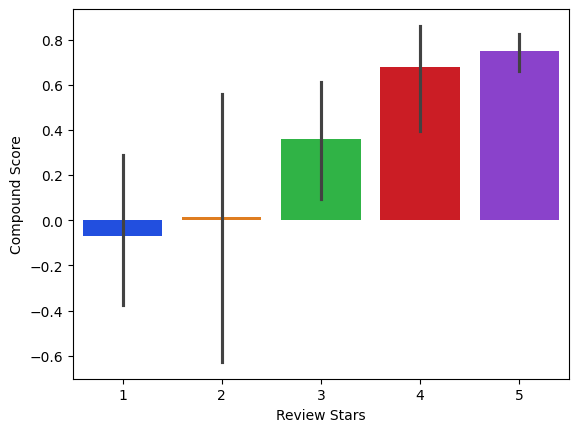

In [ ]:
# Lets have a hypothesis that all 5 star review should have a compound value that is positive
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='bright', color='blue')
ax.set_xlabel('Review Stars')
ax.set_ylabel('Compound Score')
plt.show()

Our hypothesis is correct as we can see from the graph
Lets check the same thing but for positive, negative and neutral

<ipython-input-21-8457b1e0b0bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = vaders, x='Score', y='pos', palette = 'bright', ax=axes[0])
<ipython-input-21-8457b1e0b0bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = vaders, x='Score', y='neg', palette = 'bright', ax=axes[1])
<ipython-input-21-8457b1e0b0bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = vaders, x='Score', y='neu', palette = 'bright', ax=axes[2])


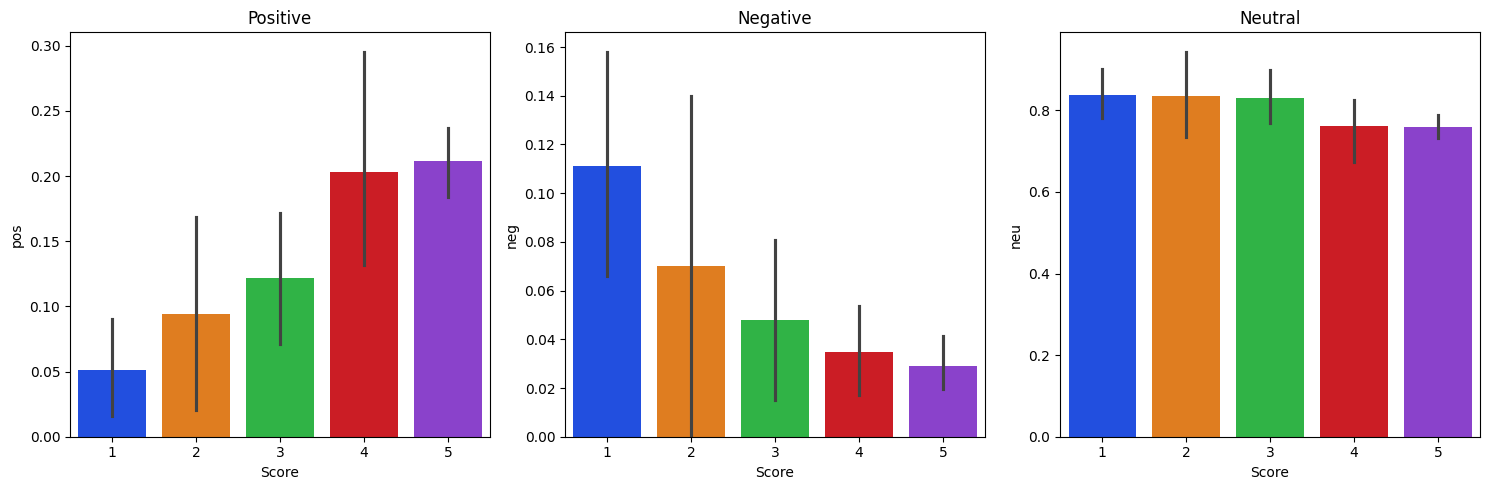

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data = vaders, x='Score', y='pos', palette = 'bright', ax=axes[0])
sns.barplot(data = vaders, x='Score', y='neg', palette = 'bright', ax=axes[1])
sns.barplot(data = vaders, x='Score', y='neu', palette = 'bright', ax=axes[2])
axes[0].set_title('Positive')
axes[1].set_title('Negative')
axes[2].set_title('Neutral')
plt.tight_layout()         # Helps to prevent graphs from overlapping
plt.show()

## roBERTa Pretrained Model(BERT variant)

This is a transformer model made by HuggingFace which is an NLP company. This model **accounts for relationships between words** in a text. For example, a negative word could actually be sarcastic or meant to be funny.

*Example: Stephen Curry killed the show tonight!*

This is actually gives a negative score on a VADER model because it doesnt account for relationships between words. Try it!

In [ ]:
sia.polarity_scores('Stephen Curry killed the show tonight!')

{'neg': 0.489, 'neu': 0.511, 'pos': 0.0, 'compound': -0.6996}

so that doesn't work so well. Let's see what ROBERTA has to offer.

We can use transfer learning to import the weights of a pretrained model and see its performance on our data.

In [ ]:
!pip install transformers           # Hugging Face library

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Softmax is an activation function. These functions introduce non-linearity into a model for deep learning to learn complex patterns. Lets give our self a reminder of how they look visually

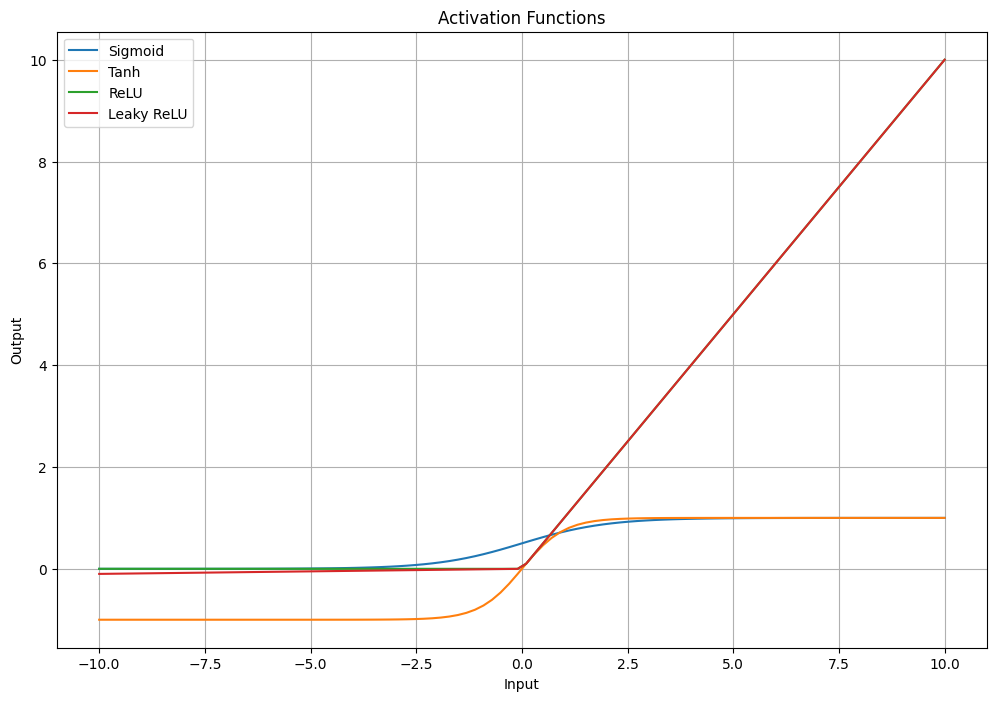

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Plot the functions
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(12, 8))

plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Back to where we were...
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Lets remeber our Stephen Curry comment from VADER MODEL
sia.polarity_scores('Stephen Curry killed the show tonight!')

{'neg': 0.489, 'neu': 0.511, 'pos': 0.0, 'compound': -0.6996}

In [ ]:
# lets apply ROBERTA
x2 = 'Stephen Curry killed the show tonight!'
print(f" TEXT: \n {x2} \n {'-'*100}")
token_text = tokenizer(x2, return_tensors = 'pt')
print(f" TOKEN TEXT: \n {token_text} \n {'-'*100}")

# Applying tokenized text to model
model_output = model(**token_text)   # Double asterix is used to unpack the keys of a dictionary as the argument, and the dict values as the argument values
print(f" MODEL OUTPUT: \n {model_output} \n {'-'*100}")

# Lets use extract the logits part of our output which is the sentiment scores, and convert them to numpy so we can change them to probabilities
scores = model_output.logits.detach().numpy()
print(f" NUMPY SCORES: \n {scores} \n {'-'*100}")

# Lets use softmax to change them to probabilities. Softmax is used for multiclass predictions like in our case
sentiment = softmax(scores)
print(f" SENTIMENT SCORES: \n {sentiment} \n {'-'*100}")

# Now the scores you see, assigned from left to right are labeled: negative, neutral and positive. Just like VADER
# You noticed how it classified it as positive meanwhile VADER said negative. Thats the power of self-attention
senti_scores = {
    'Rob_negative': sentiment[0][0],
    'Rob_neutral': sentiment[0][1],
    'Rob_positive': sentiment[0][2]
}
print(f" SENTIMENT SCORES: \n {senti_scores} \n {'-'*100}")


 TEXT: 
 Stephen Curry killed the show tonight! 
 ----------------------------------------------------------------------------------------------------
 TOKEN TEXT: 
 {'input_ids': tensor([[    0, 30273,  8320,   848,     5,   311,  3422,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])} 
 ----------------------------------------------------------------------------------------------------
 MODEL OUTPUT: 
 SequenceClassifierOutput(loss=None, logits=tensor([[-1.7674, -0.0112,  2.1772]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None) 
 ----------------------------------------------------------------------------------------------------
 NUMPY SCORES: 
 [[-1.7673999  -0.01120459  2.1772087 ]] 
 ----------------------------------------------------------------------------------------------------
 SENTIMENT SCORES: 
 [[0.01710967 0.09907123 0.8838191 ]] 
 ----------------------------------------------------------------------------------------------------

Great. Now let's try to run this on the entire dataset

In [ ]:
# Lets make a copy
df2 = df.copy()

In [ ]:
# Lets create a function for ROBERTA scoring
# Models have a maximum size of text they can accept. To avoid errors, lets use a try and except
def polarity_scores_roberta(text):
  try:
    token_text = tokenizer(text, return_tensors = 'pt')
    model_output = model(**token_text)
    scores = model_output.logits.detach().numpy()
    scores = softmax(scores)
    senti_scores = {
        'Rob_negative': scores[0][0],
        'Rob_neutral': scores[0][1],
        'Rob_positive': scores[0][2]
    }

    return senti_scores

  except RuntimeError:
    print(f'Broke for id {index+1}')

In [ ]:
vader = {}
roberta = {}
for index, text in enumerate(df2['Text']):
  vader_results = sia.polarity_scores(text)
  vader[index] = vader_results

  roberta_results = polarity_scores_roberta(text)
  roberta[index] = roberta_results

# Creating a df for roberta results and then changing the index to a column called Id that matches the original df
second = pd.DataFrame(roberta).T.reset_index().rename(columns={'index': 'Id'})
# Same for Vader model
third  = pd.DataFrame(vader).T.reset_index().rename(columns={'index': 'Id'})

# Merging them both to the original datafram
df2 = df2.merge(second, how='left', left_on='Id', right_on='Id')
df2 = df2.merge(third, how='left', left_on='Id', right_on='Id')
df2.head(2)

Broke for id 83


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rob_negative,Rob_neutral,Rob_positive,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.508986,0.452414,0.0386,0.138,0.862,0.000,-0.5664
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.003229,0.098067,0.898704,0.091,0.754,0.155,0.8265


In [ ]:
# Lets find the review that was so long for the model
long_text = df2[df2['Id']==83]['Text'].iloc[0]
print(long_text)

I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer.  I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  You will have to play with the ratios - I would not do just the heavy cream, it made the coffee too rich. Also, 

# Plotting Correlations

Lets see how the results of both models relate visually

In [ ]:
df2.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Rob_negative', 'Rob_neutral', 'Rob_positive', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

<ipython-input-63-0dc602e3a3e7>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


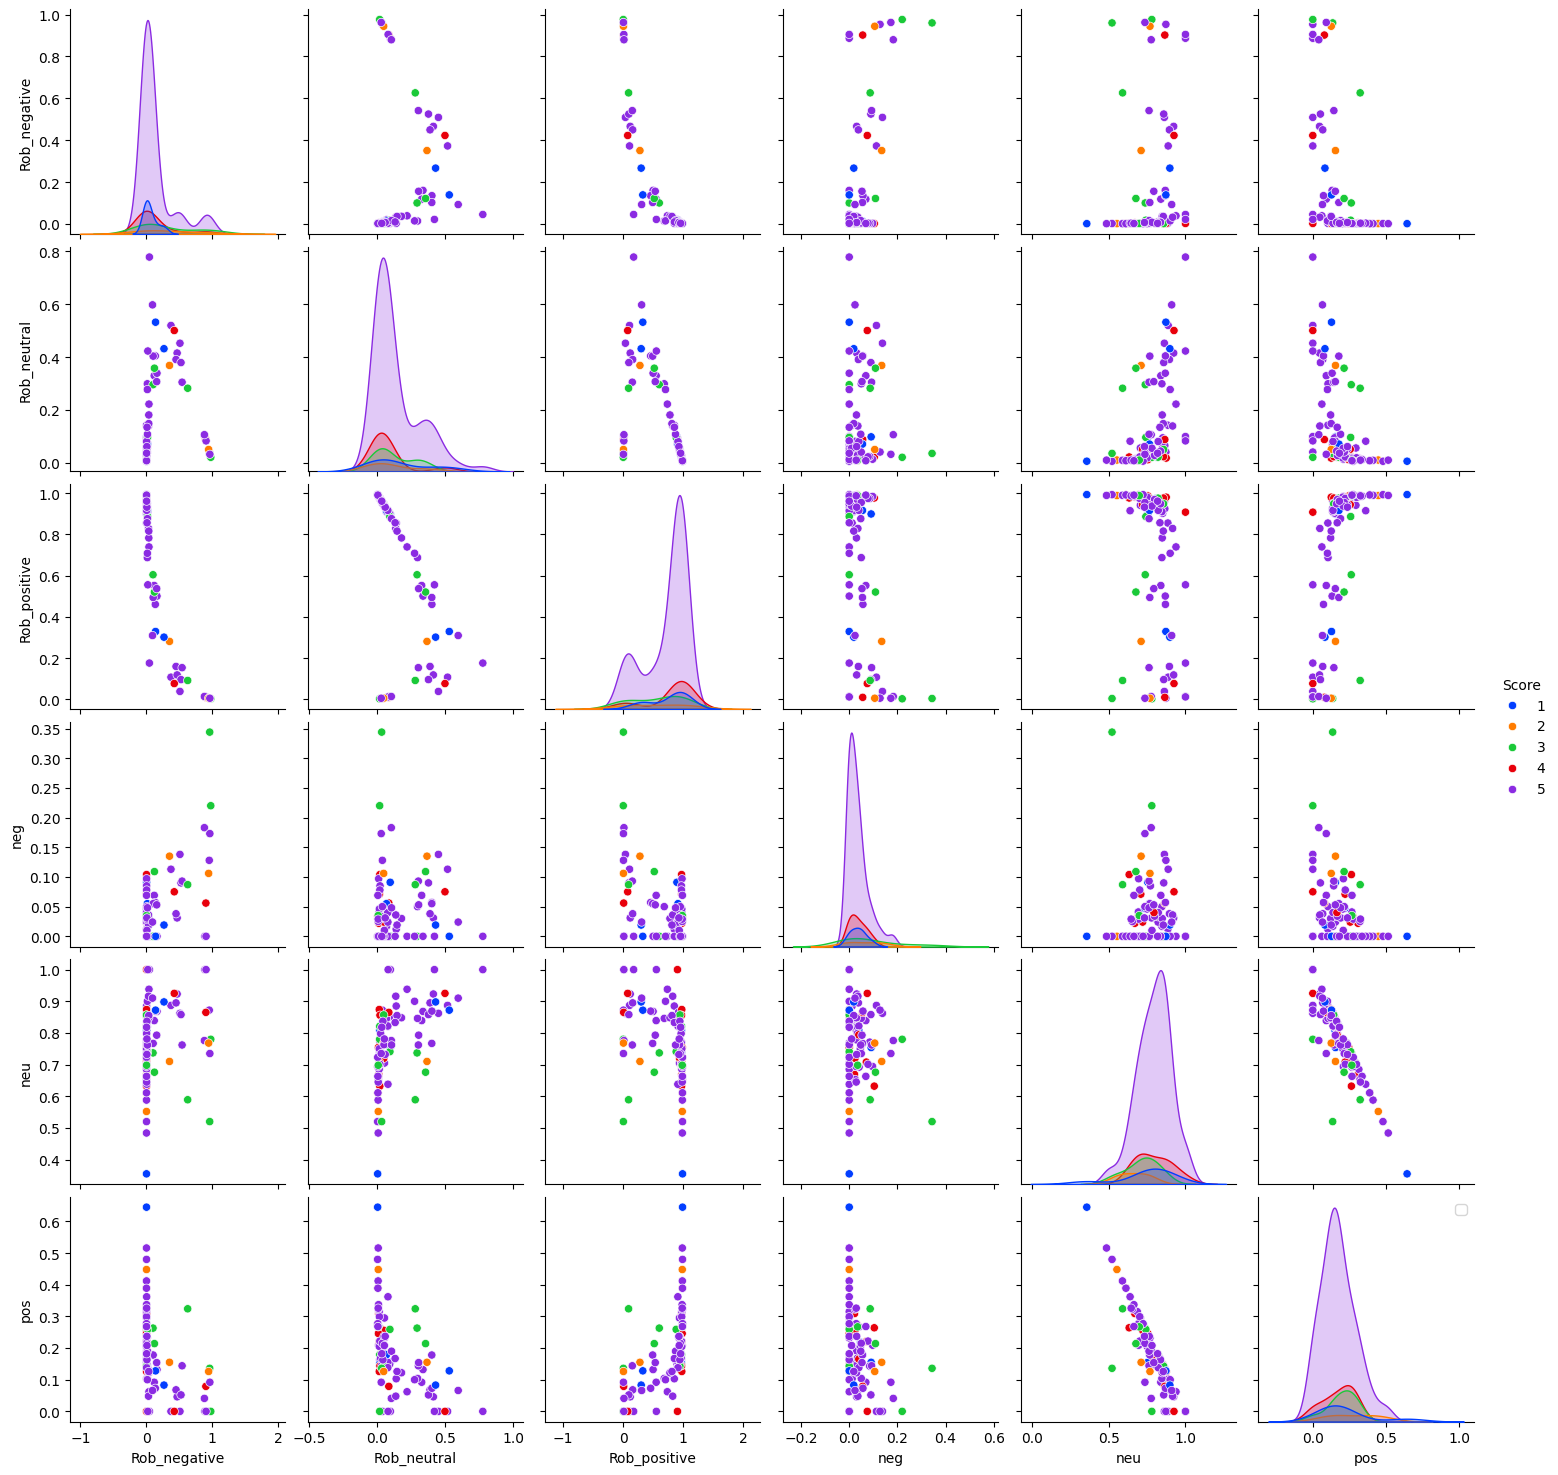

In [ ]:
sns.pairplot(data= df2, vars=['Rob_negative', 'Rob_neutral', 'Rob_positive', 'neg', 'neu', 'pos'], hue='Score', palette='bright')
plt.legend()
plt.show()

## REVIEW EXAMPLES

Let's review model predictions and see if they make sense

In [ ]:
y1 = df2.query('Score == 1').sort_values(by = 'Rob_positive', ascending = False)['Text'].values[2]
print(y1)
print('-'*100)
print(df2[df2.Text==y1][['Rob_positive', 'Rob_negative', 'Rob_neutral']])

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.
----------------------------------------------------------------------------------------------------
   Rob_positive Rob_negative Rob_neutral
50     0.968282     0.004794    0.026924


This should have had a lower positive rating to be fair because it started with a negative sentence

Lets create a code that gets all the texts and their id's that have a score of 1 and have a rob_positive of >=0.5

Also 2 and have a rob_positive of >0.55

 Also do the same for scores of 4 and 5 that have rob_negative of >0.5 and 0.55

**For score 1**

In [ ]:
df2.query('Score == 1 & Rob_positive>= 0.5').sort_values(by = 'Rob_positive', ascending = False)[['Id','Text','Score','Rob_positive']]

,Id,Text,Score,Rob_positive
12,13,My cats have been happily eating Felidae Plati...,1,0.992709
26,27,"The candy is just red , No flavor . Just plan...",1,0.973398
50,51,"This oatmeal is not good. Its mushy, soft, I d...",1,0.968282
62,63,Arrived in 6 days and were so stale i could no...,1,0.915894
1,2,Product arrived labeled as Jumbo Salted Peanut...,1,0.898704


**Now for score 2**

In [ ]:
df2.query('Score == 2 & Rob_positive > 0.55').sort_values(by = 'Rob_positive', ascending = False)[['Id','Text','Score','Rob_positive']]

,Id,Text,Score,Rob_positive
16,17,I love eating them and they are good for watch...,2,0.990882
3,4,If you are looking for the secret ingredient i...,2,0.988063


**We can see that for score 2, the reviews seem good but were poorly annotated by the customers**

**Score 4**

In [ ]:
df2.query('Score == 4 & Rob_negative > 0.55').sort_values(by = 'Rob_negative', ascending = False)[['Id','Text','Score','Rob_negative']]

,Id,Text,Score,Rob_negative
48,49,I really like the Maple and Brown Sugar flavor...,4,0.902134


**The review for score 4 didnt deserve such a heavy negative score**

**Score 5**

In [ ]:
df2.query('Score == 5 & Rob_negative > 0.5').sort_values(by = 'Rob_negative', ascending = False)[['Id','Text','Score','Rob_negative']]

,Id,Text,Score,Rob_negative
98,99,My English Bulldog had skin allergies the summ...,5,0.962443
25,26,Product received is as advertised.<br /><br />...,5,0.953316
61,62,"This bag of candy online is pretty expensive, ...",5,0.905087
44,45,We really like the McCann's steel cut oats but...,5,0.886888
66,67,For those of us on a low carb diet these littl...,5,0.879714
72,73,I ordered two of these and two of raspberry la...,5,0.541301
51,52,Got a free package of these with a bottle of b...,5,0.524854
0,1,I have bought several of the Vitality canned d...,5,0.508986


**Same as for reviews 4**

## TRANSFORMER PIPELINE: The Easy and Quick Way

In [ ]:
from transformers import pipeline
sent_pipe = pipeline(task = 'sentiment-analysis')

# There are a ton of parameters you can setting a specific model and it just uses a default one once you specify your task

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
# Let's try it out
print(sent_pipe('i love you'))
print(sent_pipe("I really like the Maple and Brown Sugar flavor. The regular is fine with brown sugar added. The Apples and Cinnamon flavor is OK. \nThis is a very quick, easy and satisfying breakfast and I'll order this brand again, but not the variety. I'll get all Maple and Brown Sugar."))
# It got this positive! Meanwhile it was negative in our ROBERTA model

print(sent_pipe('I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.'))

# It works!!

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]
[{'label': 'POSITIVE', 'score': 0.9998181462287903}]
[{'label': 'POSITIVE', 'score': 0.9688600301742554}]
[{'label': 'NEGATIVE', 'score': 0.9735291004180908}]
